# Machine Learning Notebook 1

Model 1 on DataSet 3

## Test Code

Test snippet from scikit-learn's website to confirm method is working as intended.

In [4]:
""" 
from sklearn.linear_model import SGDClassifier
X = [[0.,0.],[1.,1.]]
y = [0, 1]
clf = SGDClassifier(loss="log_loss", penalty="l2", max_iter=5)
clf.fit(X, y)

""" 

' \nfrom sklearn.linear_model import SGDClassifier\nX = [[0.,0.],[1.,1.]]\ny = [0, 1]\nclf = SGDClassifier(loss="log_loss", penalty="l2", max_iter=5)\nclf.fit(X, y)\n\n'

### LogRegression + Metrics from sci-kit's website.

In [5]:
from sklearn.linear_model import LogisticRegression #Logistic Regression Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #Analytics
from sklearn.model_selection import train_test_split #Data Splitting


## Phase 1 -> Tracking what libraries I will probably utilize.


In [6]:
#Typical Libraries

import pandas as pd #Pandas for DataFrame's
import numpy as np #Numpy for math
from PIL import Image #Pillow for image processing
from pathlib import Path #Pathlib as an OS replacement for paths
import matplotlib.pyplot as plt #Matplotlib for plotting data

#Tracking progress and time

import time
from datetime import datetime #To get the current time for a timestamp
from zoneinfo import ZoneInfo #To set my timezone
from tqdm import tqdm #tdqm for progress bars

#Possible Viz Enhancements

import seaborn as sns #Seaborn for advanced plotting (tbd)
from tabulate import tabulate #Tabulate for pretty tables (tbd)

#Machine Learning with scikit-learn

from sklearn.linear_model import LogisticRegression #Testing LogReg first.
from sklearn.preprocessing import StandardScaler #Feature Scaling
from sklearn.model_selection import train_test_split #80-20 Split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #Metrics

## Time Tracking Function

In [7]:
#Function for time tracking
def get_local_time():
    return datetime.now(ZoneInfo("America/New_York"))

class SimpleTimer:
    def __init__(self):
        self.start_time = time.time()
        
    def elapsed(self):
        seconds = time.time() - self.start_time
        if seconds < 60:
            return f"{seconds:.1f}s"
        elif seconds < 3600:
            return f"{seconds//60:.0f}m {seconds%60:.1f}s"
        else:
            hours = seconds // 3600
            minutes = (seconds % 3600) // 60
            return f"{hours:.0f}h {minutes:.0f}m"
    
    def checkpoint(self, message):
        elapsed_time = self.elapsed()
        print(f"{message} (Elapsed: {elapsed_time})")
        logging.info(f"{message} (Elapsed: {elapsed_time})")


# Initialize timer
timer = SimpleTimer()

## Setting Global Settings for the Model

In [8]:
#Global Settings
plt.style.use('ggplot')
%matplotlib inline 

#Constants for the model
IMAGE_SIZE = (128, 128)
DATASET_PATH = Path("../Data/data_images")
CSV_PATH = Path("../Data/data_sheet.csv")



In [9]:
#Checking why my CSV load keeps failing

print(CSV_PATH.resolve())
print(CSV_PATH.exists())


/Users/joshuapina/Downloads/Updated_Data_Archive_128x128_small/Data/data_sheet.csv
True


## Loading CSV

In [ ]:
df = pd.read_csv(CSV_PATH)
print("CSV shape:", df.shape)
df.head()

CSV shape: (335, 30)


,dummy_id,Gender,Age at Diag,Smoking status,Smoking status (Packs-Years),Tumor laterality,Cancer subsite of origin,HPV Status,T-category,N-category,...,Regional control,Regional control_duration of Merged updated ASRM V2,Locoregional control,Locoregional control_duration of Merged updated ASRM V2,Freedom from distant metastasis,Freedom from distant metastasis_duration of Merged updated ASRM V2,Relapse-free survival,Days to last FU,Neck Dissection after IMRT,TCIA Radiomics dummy ID of Merged updated ASRM V2
0,HNSCC-01-0216,Male,57,Former,5.0,L,Tonsil,N,2,0,...,Yes,3042.0,No,652.0,Yes,3042.0,No,3042,No,HNSCC-01-0216
1,HNSCC-01-0218,Female,55,Never,0.0,R,Base of tongue,P,2,2,...,Yes,1808.0,Yes,1808.0,Yes,1808.0,Yes,1808,No,HNSCC-01-0218
2,HNSCC-01-0219,Female,59,Never,0.0,L,Tonsil,P,2,2,...,Yes,2665.0,Yes,2665.0,Yes,2665.0,Yes,2665,No,HNSCC-01-0219
3,HNSCC-01-0221,Male,63,Current,95.0,L,Tonsil,Unknown,2,2,...,Yes,3026.0,Yes,3026.0,Yes,3026.0,Yes,3026,No,HNSCC-01-0221
4,HNSCC-01-0222,Female,71,Former,26.0,L,Base of tongue,P,4,0,...,Yes,3107.0,Yes,3107.0,Yes,3107.0,Yes,3107,No,HNSCC-01-0222


## Loading and Matching Images to CSV

In [11]:
def load_and_match_images(image_path, size=IMAGE_SIZE):
    image = Image.open(image_path).convert("RGB")
    image = image.resize(size)
    return np.array(image) / 255.0 # Normalize to [0, 1]

In [12]:
""" 
matched_data = []

for _, row in df.iterrows():
    folder_name = str(row['dummy_id'])
    folder_path = DATASET_PATH / folder_name
    
    if folder_path.exists():
        image_files = sorted(folder_path.glob("*.jpg")) 
        images = [load_and_match_images(p) for p in image_files]
        matched_data.append((row, images))
    else:
        print(f"Missing folder: {folder_path}")

""" 

' \nmatched_data = []\n\nfor _, row in df.iterrows():\n    folder_name = str(row[\'dummy_id\'])\n    folder_path = DATASET_PATH / folder_name\n\n    if folder_path.exists():\n        image_files = sorted(folder_path.glob("*.jpg")) \n        images = [load_and_match_images(p) for p in image_files]\n        matched_data.append((row, images))\n    else:\n        print(f"Missing folder: {folder_path}")\n\n'

## Error found

My folders are each named "HNSCC-01-0216_ct_images", where the csv does not have "_ct_images" on it. They are just "HNSCC-01-0216".

I need to change the logic when finding/pulling folders.

In [13]:
""" 

matched_data = []

for _, row in df.iterrows():
    folder_name = str(row['dummy_id']) + "_ct_images"
    folder_path = DATASET_PATH / folder_name
    
    if folder_path.exists():
        image_files = sorted(folder_path.glob("*.jpg"))  
        images = [load_and_match_images(p) for p in image_files]
        matched_data.append((row, images))
    else:
        print(f"Missing folder: {folder_path}")

""" 

' \n\nmatched_data = []\n\nfor _, row in df.iterrows():\n    folder_name = str(row[\'dummy_id\']) + "_ct_images"\n    folder_path = DATASET_PATH / folder_name\n\n    if folder_path.exists():\n        image_files = sorted(folder_path.glob("*.jpg"))  \n        images = [load_and_match_images(p) for p in image_files]\n        matched_data.append((row, images))\n    else:\n        print(f"Missing folder: {folder_path}")\n\n'

## Timer and tqdm added

I underestimated how long the code above would take to run and I expected a near immediate output. I added a timer and tqdm for progress tracking, to get a better idea of what is going on behind the hood.

In [14]:
#Previous code interrupted to add timer and tqdm for progress tracking

""" 

matched_data = []

start = time.time()

for _, row in tqdm(df.iterrows(), total=len(df), desc="Matching Images"):
    folder_name = str(row['dummy_id']) + "_ct_images"
    folder_path = DATASET_PATH / folder_name
    
    if folder_path.exists():
        image_files = sorted(folder_path.glob("*.jpg"))  
        images = [load_and_match_images(p) for p in image_files]
        matched_data.append((row, images))
    else:
        print(f"Missing folder: {folder_path}")

""" 

' \n\nmatched_data = []\n\nstart = time.time()\n\nfor _, row in tqdm(df.iterrows(), total=len(df), desc="Matching Images"):\n    folder_name = str(row[\'dummy_id\']) + "_ct_images"\n    folder_path = DATASET_PATH / folder_name\n\n    if folder_path.exists():\n        image_files = sorted(folder_path.glob("*.jpg"))  \n        images = [load_and_match_images(p) for p in image_files]\n        matched_data.append((row, images))\n    else:\n        print(f"Missing folder: {folder_path}")\n\n'

## Memory Balloon...
Loading + Matching the images to the CSV's took almost 7 minutes, and cause my memory usage to hit 37.88GB.

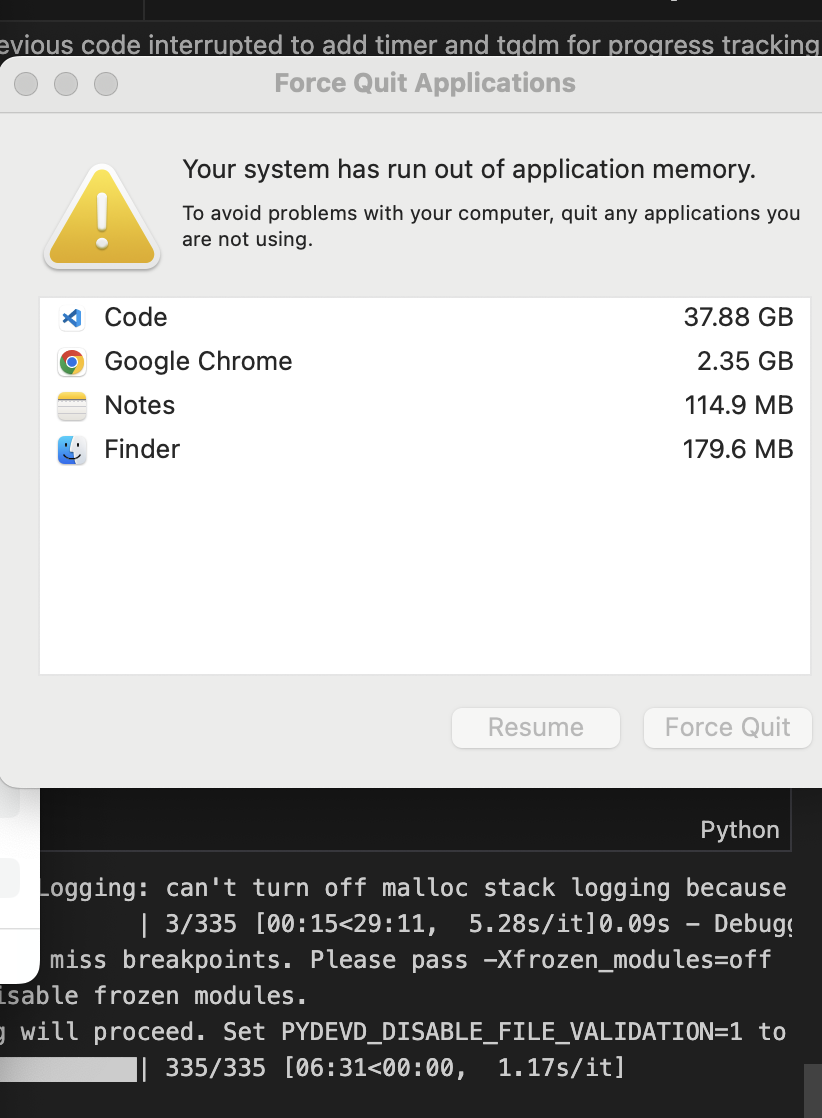

In [15]:
from IPython.display import Image, display

display(Image(filename="../Visualizations/memory_balloon.jpg", width=300))

## I failed myself...
By not implementing Batches and Garbage Collection here.

In [ ]:
""" 

import gc
import time
import psutil
import os
from tqdm import tqdm

# Get current process memory usage in MB
def get_memory_usage():
    process = psutil.Process(os.getpid())
    mem_mb = process.memory_info().rss / 1024**2
    return f"{mem_mb:.2f} MB"

# Adaptive garbage collection if memory exceeds threshold
def adaptive_gc(threshold_gb=35):
    mem_gb = psutil.Process(os.getpid()).memory_info().rss / 1024**3
    if mem_gb > threshold_gb:
        print(f"RAM at {mem_gb:.2f} GB — triggering garbage collection")
        gc.collect()

def process_large_folders(df, dataset_path, batch_size=1000, memory_threshold_gb=35):
    matched_data = []
    start = time.time()
    total_batches = (len(df) - 1) // batch_size + 1

    print(f"🚀 Starting Processing")
    print(f"Total rows: {len(df)} | Batch size: {batch_size} | Total batches: {total_batches}")
    print(f"Initial memory usage: {get_memory_usage()}")
    print("-" * 60)

    for batch_start in range(0, len(df), batch_size):
        batch_end = min(batch_start + batch_size, len(df))
        batch_df = df.iloc[batch_start:batch_end]

        batch_num = batch_start // batch_size + 1
        print(f"\n Batch {batch_num}/{total_batches} (Rows {batch_start}-{batch_end-1})")
        print(f"Memory before batch: {get_memory_usage()}")

        batch_data = []
        for idx, (_, row) in enumerate(tqdm(batch_df.iterrows(), total=len(batch_df), desc=f"Processing Batch {batch_num}")):
            folder_name = str(row['dummy_id']) + "_ct_images"
            folder_path = dataset_path / folder_name

            if folder_path.exists():
                image_files = sorted(folder_path.glob("*.jpg"))
                image_batch = []

                for j, img_path in enumerate(image_files):
                    img = load_and_match_images(img_path)
                    image_batch.append(img)

                    if (j + 1) % 1000 == 0:
                        adaptive_gc(threshold_gb=memory_threshold_gb)

                if image_batch:
                    batch_data.append((row, image_batch.copy()))
                    del image_batch
                    gc.collect()
            else:
                if idx < 5:
                    print(f"  ⚠️ Missing folder: {folder_path}")

        matched_data.extend(batch_data)
        del batch_data
        gc.collect()

        print(f"Batch {batch_num} complete | Memory now: {get_memory_usage()} | Total matched: {len(matched_data)}")

    end = time.time()
    print("\nPROCESSING COMPLETE")
    print(f"Total time: {end - start:.2f}s | Avg per batch: {(end - start)/total_batches:.2f}s")
    print(f"Final memory usage: {get_memory_usage()} | Total matched folders: {len(matched_data)}")
    print("=" * 60)

    return matched_data
# Call the function to start the processing
matched_data = process_large_folders(df, DATASET_PATH, batch_size=1000)
""" 

' \n\nimport gc\nimport time\nimport psutil\nimport os\nfrom tqdm import tqdm\n\n# Get current process memory usage in MB\ndef get_memory_usage():\n    process = psutil.Process(os.getpid())\n    mem_mb = process.memory_info().rss / 1024**2\n    return f"{mem_mb:.2f} MB"\n\n# Adaptive garbage collection if memory exceeds threshold\ndef adaptive_gc(threshold_gb=35):\n    mem_gb = psutil.Process(os.getpid()).memory_info().rss / 1024**3\n    if mem_gb > threshold_gb:\n        print(f"RAM at {mem_gb:.2f} GB — triggering garbage collection")\n        gc.collect()\n\ndef process_large_folders(df, dataset_path, batch_size=1000, memory_threshold_gb=35):\n    matched_data = []\n    start = time.time()\n    total_batches = (len(df) - 1) // batch_size + 1\n\n    print(f"🚀 Starting Processing")\n    print(f"Total rows: {len(df)} | Batch size: {batch_size} | Total batches: {total_batches}")\n    print(f"Initial memory usage: {get_memory_usage()}")\n    print("-" * 60)\n\n    for batch_start in range

: 

### Notes for the script above.

I originally implemented batching wrong, and did Batch Size by folder, when I wanted to batch by images. The time it took to run the code was still roughly 3 minutes faster than my previous iteration. The AI code assistance Garbage Collection seems to have worked, but I will edit the code to correctly batch. 

In [ ]:
import gc
import psutil
import os
from PIL import Image

def load_and_match_images(image_path, size=IMAGE_SIZE):
    image = Image.open(image_path).convert("RGB")
    image = image.resize(size)
    return np.array(image) / 255.0 # Normalize to [0, 1]


def get_memory_usage():
    process = psutil.Process(os.getpid())
    mem_mb = process.memory_info().rss / 1024**2
    return f"{mem_mb:.2f} MB"

# Adaptive garbage collection if memory exceeds threshold
def adaptive_gc(threshold_gb=35):
    mem_gb = psutil.Process(os.getpid()).memory_info().rss / 1024**3
    if mem_gb > threshold_gb:
        print(f"RAM at {mem_gb:.2f} GB — triggering garbage collection")
        gc.collect()

def process_large_folders(df, dataset_path, batch_size=1000, memory_threshold_gb=35):
    matched_data = []
    start = time.time()
    total_batches = (len(df) - 1) // batch_size + 1

    print(f"🚀 Starting Processing")
    print(f"Total rows: {len(df)} | Batch size: {batch_size} | Total batches: {total_batches}")
    print(f"Initial memory usage: {get_memory_usage()}")
    print("-" * 60)

    for batch_start in range(0, len(df), batch_size):
        batch_end = min(batch_start + batch_size, len(df))
        batch_df = df.iloc[batch_start:batch_end]

        batch_num = batch_start // batch_size + 1
        print(f"\n Batch {batch_num}/{total_batches} (Rows {batch_start}-{batch_end-1})")
        print(f"Memory before batch: {get_memory_usage()}")

        batch_data = []
        for idx, (_, row) in enumerate(tqdm(batch_df.iterrows(), total=len(batch_df), desc=f"Processing Batch {batch_num}")):
            folder_name = str(row['dummy_id']) + "_ct_images"
            folder_path = dataset_path / folder_name

            if folder_path.exists():
                image_files = sorted(folder_path.glob("*.jpg"))
                image_batch = []

                for j, img_path in enumerate(image_files):
                    img = load_and_match_images(img_path)
                    image_batch.append(img)

                    if (j + 1) % 1000 == 0:
                        adaptive_gc(threshold_gb=memory_threshold_gb)

                if image_batch:
                    batch_data.append((row, image_batch.copy()))
                    del image_batch
                    gc.collect()
            else:
                if idx < 5:
                    print(f"  ⚠️ Missing folder: {folder_path}")

        matched_data.extend(batch_data)
        del batch_data
        gc.collect()

        print(f"Batch {batch_num} complete | Memory now: {get_memory_usage()} | Total matched: {len(matched_data)}")

    end = time.time()
    print("\nPROCESSING COMPLETE")
    print(f"Total time: {end - start:.2f}s | Avg per batch: {(end - start)/total_batches:.2f}s")
    print(f"Final memory usage: {get_memory_usage()} | Total matched folders: {len(matched_data)}")
    print("=" * 60)

    return matched_data
# Call the function to start the processing
matched_data = process_large_folders(df, DATASET_PATH, batch_size=50)


🚀 Starting Processing
Total rows: 335 | Batch size: 50 | Total batches: 7
Initial memory usage: 103.42 MB
------------------------------------------------------------

 Batch 1/7 (Rows 0-49)
Memory before batch: 103.44 MB


Processing Batch 1: 100%|██████████| 50/50 [00:28<00:00,  1.77it/s]


Batch 1 complete | Memory now: 259.47 MB | Total matched: 50

 Batch 2/7 (Rows 50-99)
Memory before batch: 259.62 MB


Processing Batch 2: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it]


Batch 2 complete | Memory now: 259.14 MB | Total matched: 100

 Batch 3/7 (Rows 100-149)
Memory before batch: 259.27 MB


Processing Batch 3: 100%|██████████| 50/50 [00:44<00:00,  1.11it/s]


Batch 3 complete | Memory now: 352.05 MB | Total matched: 150

 Batch 4/7 (Rows 150-199)
Memory before batch: 352.20 MB


Processing Batch 4: 100%|██████████| 50/50 [00:47<00:00,  1.04it/s]


Batch 4 complete | Memory now: 371.78 MB | Total matched: 200

 Batch 5/7 (Rows 200-249)
Memory before batch: 371.92 MB


Processing Batch 5: 100%|██████████| 50/50 [00:53<00:00,  1.06s/it]


Batch 5 complete | Memory now: 254.80 MB | Total matched: 250

 Batch 6/7 (Rows 250-299)
Memory before batch: 254.95 MB


Processing Batch 6: 100%|██████████| 50/50 [00:46<00:00,  1.08it/s]


Batch 6 complete | Memory now: 232.47 MB | Total matched: 300

 Batch 7/7 (Rows 300-334)
Memory before batch: 232.72 MB


Processing Batch 7:  94%|█████████▍| 33/35 [00:29<00:01,  1.49it/s]

< 5 Minutes for script completion.

The next script confirms the parameter I will use for my first models

In [ ]:
df = pd.read_csv(CSV_PATH)
print()
print("-"*60)
print("Dataframe shape:", df.shape)
print("-"*60)
print("Selected Parameter:")
print()
df["Tumor laterality"] = df["Tumor laterality"].str.strip().str.upper()
laterality_counts = df["Tumor laterality"].value_counts(dropna=False)
print(laterality_counts.to_string())
print()
print("-"*60)
print()



------------------------------------------------------------
Dataframe shape: (335, 30)
------------------------------------------------------------
Selected Parameter:

Tumor laterality
R          164
L          163
MIDLINE      5
NOS          3

------------------------------------------------------------



## Model Decision

Due to this being a near 50/50 split, I will try three different versions of my LogRegression to see which works best.

- Version 1: Binary Classificataion - removing MID + NOS from dataset.
- Version 2: Multiclass - keep classes intact & seeing what happens.
- Version 3: Ambiguous - MID + NOS = ambig 


In [ ]:
binary_df = df[df["Tumor laterality"].isin(["L", "R"])].copy()
binary_df["Binary Label"] = binary_df["Tumor laterality"].map({"L": 0, "R": 1})
print("-"*42)
print("Tumor laterality value counts (filtered):")
print("-"*42)
print(binary_df["Tumor laterality"].value_counts())
print("-"*43)
print(binary_df["Binary Label"].value_counts())
print("-"*43)
print("Confirmation Preview of binary_df:")
print("-"*35)
print(binary_df[["dummy_id", "Tumor laterality", "Binary Label"]].head())
print("-"*53)

------------------------------------------
Tumor laterality value counts (filtered):
------------------------------------------
Tumor laterality
R    164
L    163
Name: count, dtype: int64
-------------------------------------------
Binary Label
1    164
0    163
Name: count, dtype: int64
-------------------------------------------
Confirmation Preview of binary_df:
-----------------------------------
        dummy_id Tumor laterality  Binary Label
0  HNSCC-01-0216                L             0
1  HNSCC-01-0218                R             1
2  HNSCC-01-0219                L             0
3  HNSCC-01-0221                L             0
4  HNSCC-01-0222                L             0
-----------------------------------------------------


In [ ]:
X = []
y = []

for row, images in matched_data:
    if row["Tumor laterality"] in ["L", "R"]:
        label = 1 if row["Tumor laterality"] == "R" else 0
        avg_image = np.mean(images, axis=0).flatten()  # collapse list of images into one vector
        X.append(avg_image)
        y.append(label)

X = np.array(X)
y = np.array(y)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X1_train, y1_train)

y1_pred = clf.predict(X1_test)
print(classification_report(y1_test, y1_pred))
print("Accuracy:", accuracy_score(y1_test, y1_pred))


              precision    recall  f1-score   support

           0       0.62      0.55      0.58        29
           1       0.68      0.73      0.70        37

    accuracy                           0.65        66
   macro avg       0.65      0.64      0.64        66
weighted avg       0.65      0.65      0.65        66

Accuracy: 0.6515151515151515


Notes:

- I discovered the usefulness of adding stratify as the previous support showed that my test data was not cleanly split down the middle like I wanted to. 

- I failed to include visualizations, that is added next. 

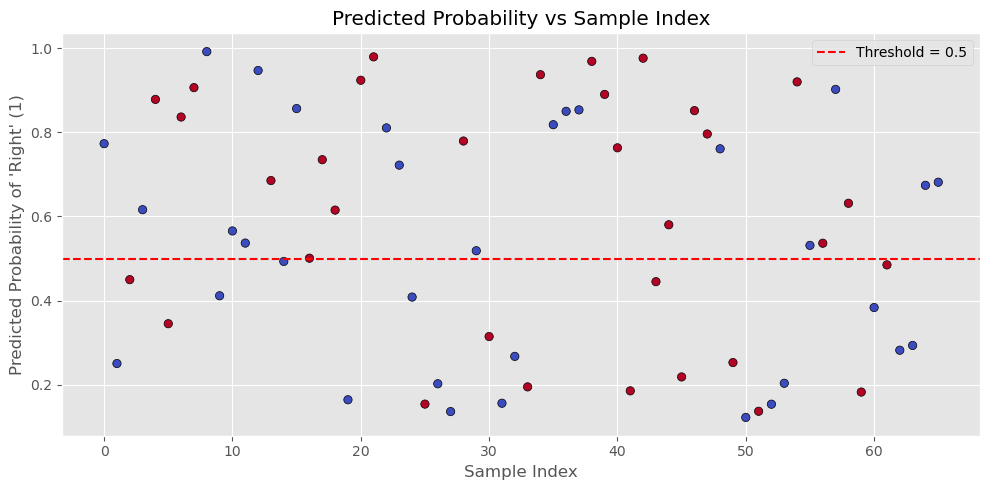

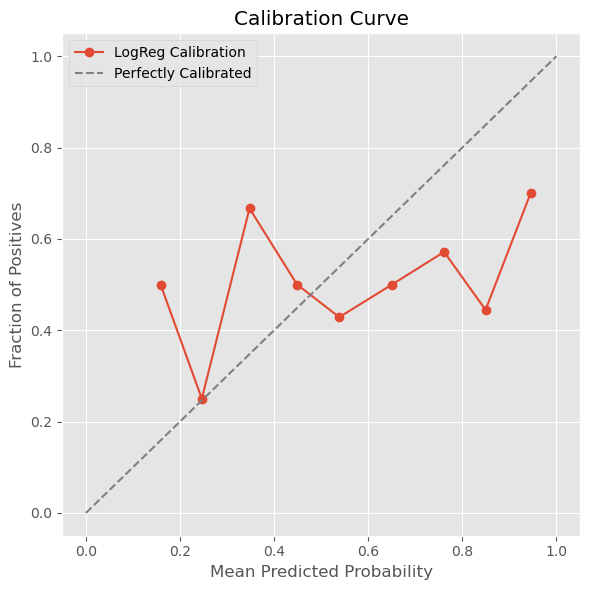

Classification Report:
              precision    recall  f1-score   support

    Left (0)       0.56      0.45      0.50        33
   Right (1)       0.54      0.64      0.58        33

    accuracy                           0.55        66
   macro avg       0.55      0.55      0.54        66
weighted avg       0.55      0.55      0.54        66

Accuracy: 0.545
AUC: 0.590


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X2_train, y2_train)

# Predict probabilities
y_probs = model.predict_proba(X2_test)[:, 1]  # Probabilities for class "1"
y_preds = model.predict(X2_test)  # Hard 0/1 predictions

plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_probs)), y_probs, c=y2_test, cmap='coolwarm', edgecolors='k')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Predicted Probability vs Sample Index")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability of 'Right' (1)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y2_test, y_probs, n_bins=10)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='LogReg Calibration')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Classification Report:")
print(classification_report(y2_test, y_preds, target_names=["Left (0)", "Right (1)"]))
print(f"Accuracy: {accuracy_score(y2_test, y_preds):.3f}")
print(f"AUC: {roc_auc_score(y2_test, y_probs):.3f}")



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score, roc_auc_score

def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)

    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.3f}")

    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
        try:
            auc = roc_auc_score(y_test, y_probs)
            print(f"{name} - AUC: {auc:.3f}")
        except:
            print(f"{name} - AUC: Could not be computed.")
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()



LogReg Model 1 - Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58        29
           1       0.68      0.73      0.70        37

    accuracy                           0.65        66
   macro avg       0.65      0.64      0.64        66
weighted avg       0.65      0.65      0.65        66

LogReg Model 1 - Accuracy: 0.652
LogReg Model 1 - AUC: 0.693


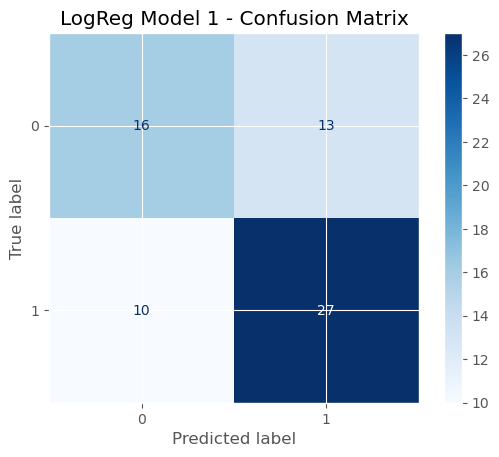


LogReg Model 2 - Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        33
           1       0.54      0.64      0.58        33

    accuracy                           0.55        66
   macro avg       0.55      0.55      0.54        66
weighted avg       0.55      0.55      0.54        66

LogReg Model 2 - Accuracy: 0.545
LogReg Model 2 - AUC: 0.590


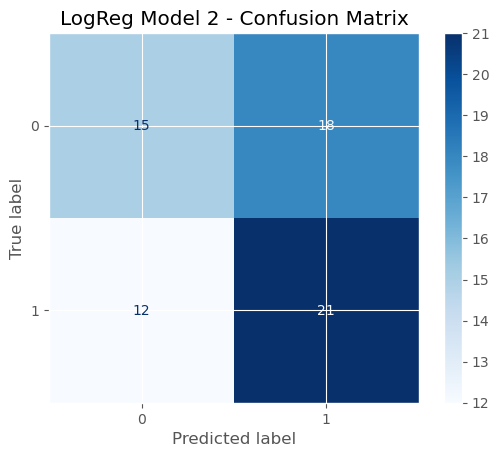

In [ ]:
models = {
    "LogReg Model 1": (clf, X1_test, y1_test),
    "LogReg Model 2": (model, X2_test, y2_test)
}

for name, (m, X_, y_) in models.items():
    evaluate_model(m, X_, y_, name=name)


In [ ]:
df = pd.read_csv(CSV_PATH)
print()
print("-"*60)
print("Dataframe shape:", df.shape)
print("-"*60)
print("Selected Parameter:")
print()
df["Tumor laterality"] = df["Tumor laterality"].str.strip().str.upper()
laterality_counts = df["Tumor laterality"].value_counts(dropna=False)
print(laterality_counts.to_string())
print()
print("-"*60)
print()



------------------------------------------------------------
Dataframe shape: (335, 30)
------------------------------------------------------------
Selected Parameter:

Tumor laterality
R          164
L          163
MIDLINE      5
NOS          3

------------------------------------------------------------



In [ ]:
#Logistic Regression -> Multiclass
from sklearn.preprocessing import LabelEncoder

X3 = []
y3 = []

for row, images in matched_data:
    label = row["Tumor laterality"].strip().upper()
    avg_image = np.mean(images, axis=0).flatten()
    X3.append(avg_image)
    y3.append(label)

X3 = np.array(X3)
y3 = np.array(y3)



le3 = LabelEncoder()
y3_encoded = le3.fit_transform(y3)

print("Label Mapping:", dict(zip(le3.classes_, le3.transform(le3.classes_))))


Label Mapping: {np.str_('L'): np.int64(0), np.str_('MIDLINE'): np.int64(1), np.str_('NOS'): np.int64(2), np.str_('R'): np.int64(3)}


/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml-env/lib/py

              precision    recall  f1-score   support

           L       0.54      0.47      0.50        32
     MIDLINE       0.00      0.00      0.00         1
         NOS       0.00      0.00      0.00         1
           R       0.54      0.64      0.58        33

    accuracy                           0.54        67
   macro avg       0.27      0.28      0.27        67
weighted avg       0.52      0.54      0.53        67



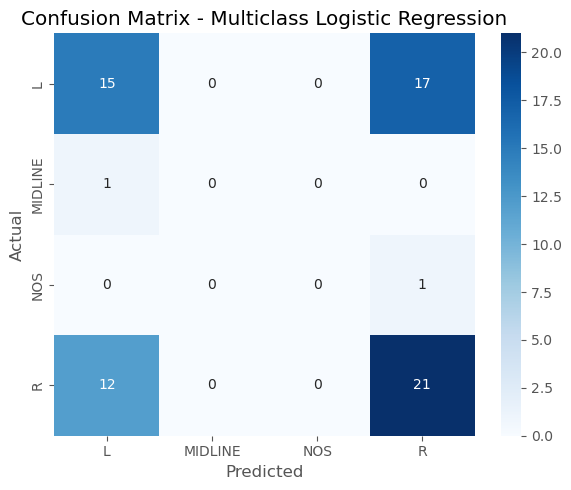

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3_encoded, test_size=0.2, stratify=y3_encoded, random_state=42
)


logreg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg_multi.fit(X3_train, y3_train)


y3_pred = logreg_multi.predict(X3_test)

# Classification report
print(classification_report(y3_test, y3_pred, target_names=le3.classes_))

# Confusion matrix
cm = confusion_matrix(y3_test, y3_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le3.classes_, yticklabels=le3.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Multiclass Logistic Regression")
plt.tight_layout()
plt.show()


## Note: Multiclass with this split...clearly not good. 


LogReg Model 1 - Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58        29
           1       0.68      0.73      0.70        37

    accuracy                           0.65        66
   macro avg       0.65      0.64      0.64        66
weighted avg       0.65      0.65      0.65        66

LogReg Model 1 - Accuracy: 0.652
LogReg Model 1 - AUC: 0.693


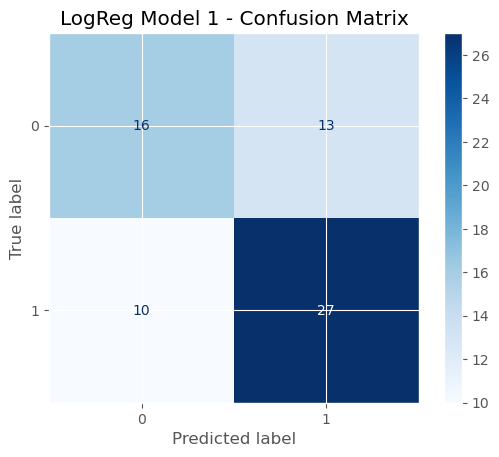


LogReg Model 2 - Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        33
           1       0.54      0.64      0.58        33

    accuracy                           0.55        66
   macro avg       0.55      0.55      0.54        66
weighted avg       0.55      0.55      0.54        66

LogReg Model 2 - Accuracy: 0.545
LogReg Model 2 - AUC: 0.590


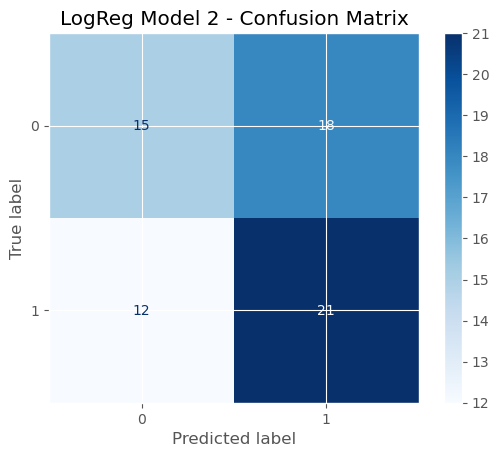


LogReg Multiclass - Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.47      0.50        32
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.54      0.64      0.58        33

    accuracy                           0.54        67
   macro avg       0.27      0.28      0.27        67
weighted avg       0.52      0.54      0.53        67

LogReg Multiclass - Accuracy: 0.537
LogReg Multiclass - AUC: Could not be computed.


/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


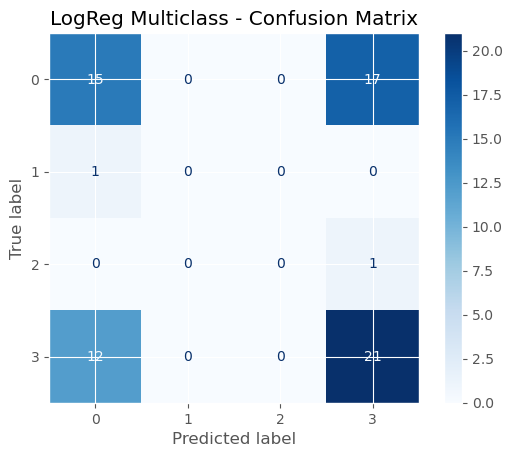

In [ ]:
models = {
    "LogReg Model 1": (clf, X1_test, y1_test),
    "LogReg Model 2": (model, X2_test, y2_test),
    "LogReg Multiclass": (logreg_multi, X3_test, y3_test),
}

for name, (m, X_, y_) in models.items():
    evaluate_model(m, X_, y_, name=name)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd

def evaluate_model_clean(model, X_test, y_test, label_encoder=None, name="Model"):
    y_pred = model.predict(X_test)
    
    # Safe AUC computation
    try:
        if len(set(y_test)) > 2:
            auc = "N/A"
        else:
            y_prob = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_prob)
    except Exception:
        auc = "Error"

    report = classification_report(
        y_test, y_pred, output_dict=True, zero_division=0,
        target_names=label_encoder.classes_ if label_encoder else None
    )

    # Flatten report into row
    metrics = {
        "Model": name,
        "Accuracy": report["accuracy"],
        "AUC": auc,
        "Macro Avg Precision": report["macro avg"]["precision"],
        "Macro Avg Recall": report["macro avg"]["recall"],
        "Macro Avg F1": report["macro avg"]["f1-score"],
        "Weighted Avg F1": report["weighted avg"]["f1-score"]
    }

    # Add class-specific metrics
    for label in report:
        if label not in ("accuracy", "macro avg", "weighted avg"):
            metrics[f"{label} - Precision"] = report[label]["precision"]
            metrics[f"{label} - Recall"] = report[label]["recall"]
            metrics[f"{label} - F1"] = report[label]["f1-score"]

    return metrics

results = []

results.append(evaluate_model_clean(clf, X1_test, y1_test, name="LogReg Model 1"))
results.append(evaluate_model_clean(model, X2_test, y2_test, name="LogReg Model 2"))
results.append(evaluate_model_clean(logreg_multi, X3_test, y3_test, label_encoder=le3, name="LogReg Multiclass"))

df_results = pd.DataFrame(results)
print(tabulate(df_results, headers='keys', tablefmt='fancy_grid', showindex=False))


╒═══════════════════╤════════════╤════════════════════╤═══════════════════════╤════════════════════╤════════════════╤═══════════════════╤═════════════════╤══════════════╤════════════╤═════════════════╤══════════════╤════════════╤═════════════════╤══════════════╤══════════╤═══════════════════════╤════════════════════╤════════════════╤═══════════════════╤════════════════╤════════════╤═════════════════╤══════════════╤════════════╕
│ Model             │   Accuracy │ AUC                │   Macro Avg Precision │   Macro Avg Recall │   Macro Avg F1 │   Weighted Avg F1 │   0 - Precision │   0 - Recall │     0 - F1 │   1 - Precision │   1 - Recall │     1 - F1 │   L - Precision │   L - Recall │   L - F1 │   MIDLINE - Precision │   MIDLINE - Recall │   MIDLINE - F1 │   NOS - Precision │   NOS - Recall │   NOS - F1 │   R - Precision │   R - Recall │     R - F1 │
╞═══════════════════╪════════════╪════════════════════╪═══════════════════════╪════════════════════╪════════════════╪═══════════════════

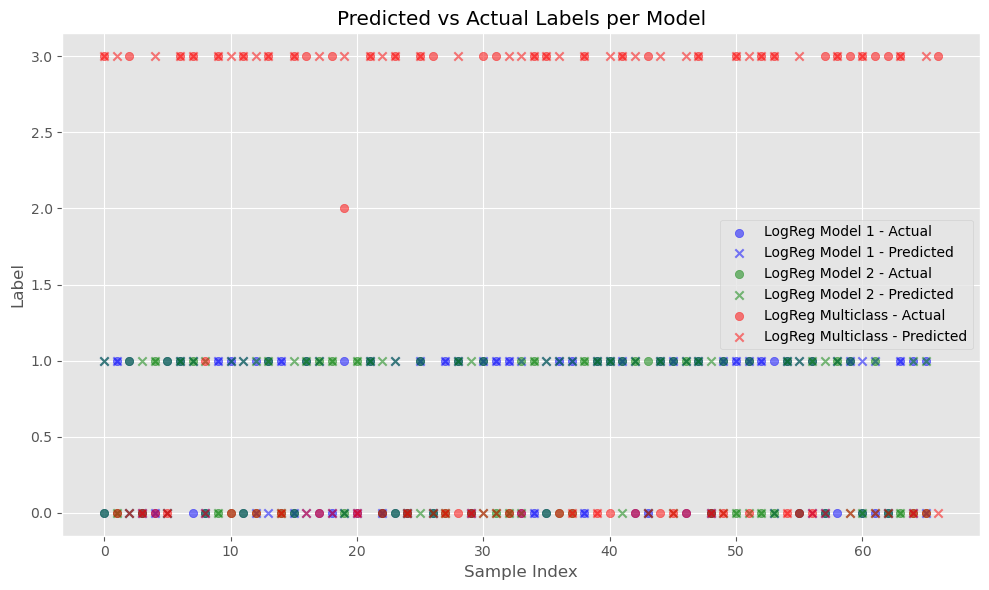

In [ ]:
import matplotlib.pyplot as plt

# Optional: set up color mapping per model
model_colors = {
    "LogReg Model 1": "blue",
    "LogReg Model 2": "green",
    "LogReg Multiclass": "red"
}

plt.figure(figsize=(10, 6))
for name, (m, X_, y_) in models.items():
    y_pred = m.predict(X_)
    plt.scatter(range(len(y_)), y_, label=f'{name} - Actual', alpha=0.5, marker='o', c=model_colors[name])
    plt.scatter(range(len(y_pred)), y_pred, label=f'{name} - Predicted', alpha=0.5, marker='x', c=model_colors[name])

plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.title('Predicted vs Actual Labels per Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


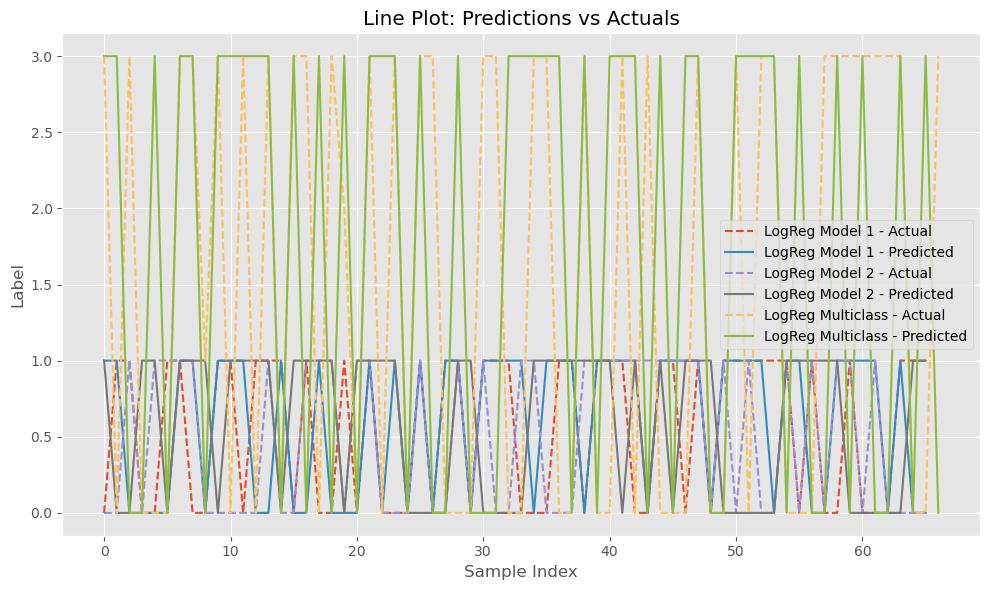

In [ ]:
plt.figure(figsize=(10, 6))
for name, (m, X_, y_) in models.items():
    y_pred = m.predict(X_)
    plt.plot(y_, label=f'{name} - Actual', linestyle='dashed')
    plt.plot(y_pred, label=f'{name} - Predicted', linestyle='solid')

plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.title('Line Plot: Predictions vs Actuals')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, X_test, y_test, name="Model"):
    print(f"\n--- {name} ---")
    y_pred = model.predict(X_test)

    # Automatically infer unique labels
    labels = np.unique(np.concatenate((y_test, y_pred)))
    label_names = [str(l) for l in labels]

    try:
        print(classification_report(y_test, y_pred, target_names=label_names))
    except ValueError as e:
        print(f"Could not apply label names due to mismatch: {e}")
        print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=label_names,
        yticklabels=label_names
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix: {name}")
    plt.tight_layout()
    plt.show()


In [ ]:
models = {
    "LogReg Model 1": (clf, X1_test, y1_test),
    "LogReg Model 2": (model, X2_test, y2_test),
    "LogReg Multiclass": (logreg_multi, X3_test, y3_test),
}


In [ ]:
def viz_model_performance(models):
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))  # One row per model

    for i, (name, (model, X, y)) in enumerate(models.items()):
        y_pred = model.predict(X)
        axes[i].plot(y, label='Actual', linestyle='--', alpha=0.7)
        axes[i].plot(y_pred, label='Predicted', linestyle='-', alpha=0.7)
        axes[i].set_title(f"{name} – Actual vs Predicted")
        axes[i].set_xlabel("Sample Index")
        axes[i].set_ylabel("Label")
        axes[i].legend()

    plt.tight_layout()
    plt.show()



--- LogReg Model 1 ---
              precision    recall  f1-score   support

           0       0.62      0.55      0.58        29
           1       0.68      0.73      0.70        37

    accuracy                           0.65        66
   macro avg       0.65      0.64      0.64        66
weighted avg       0.65      0.65      0.65        66



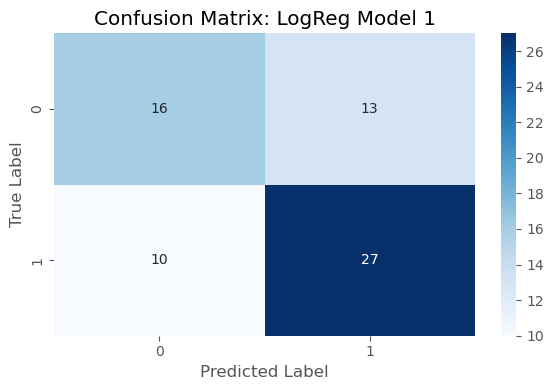


--- LogReg Model 2 ---
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        33
           1       0.54      0.64      0.58        33

    accuracy                           0.55        66
   macro avg       0.55      0.55      0.54        66
weighted avg       0.55      0.55      0.54        66



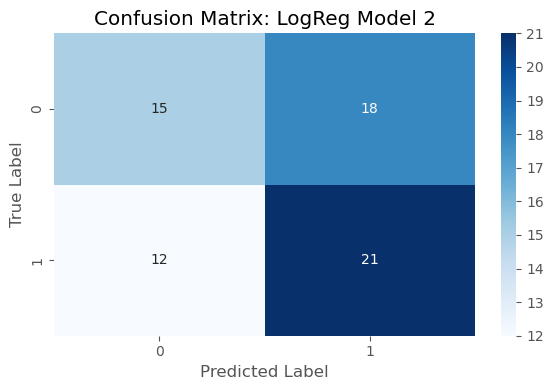


--- LogReg Multiclass ---
              precision    recall  f1-score   support

           0       0.54      0.47      0.50        32
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.54      0.64      0.58        33

    accuracy                           0.54        67
   macro avg       0.27      0.28      0.27        67
weighted avg       0.52      0.54      0.53        67



/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


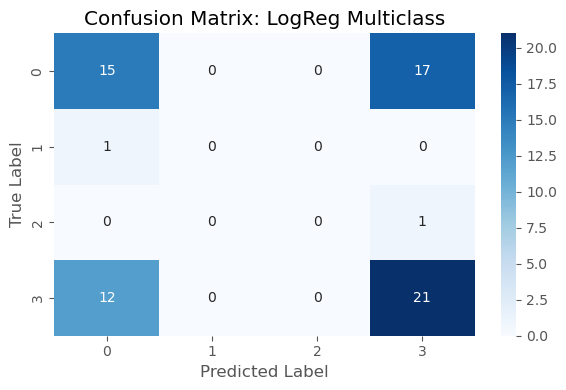

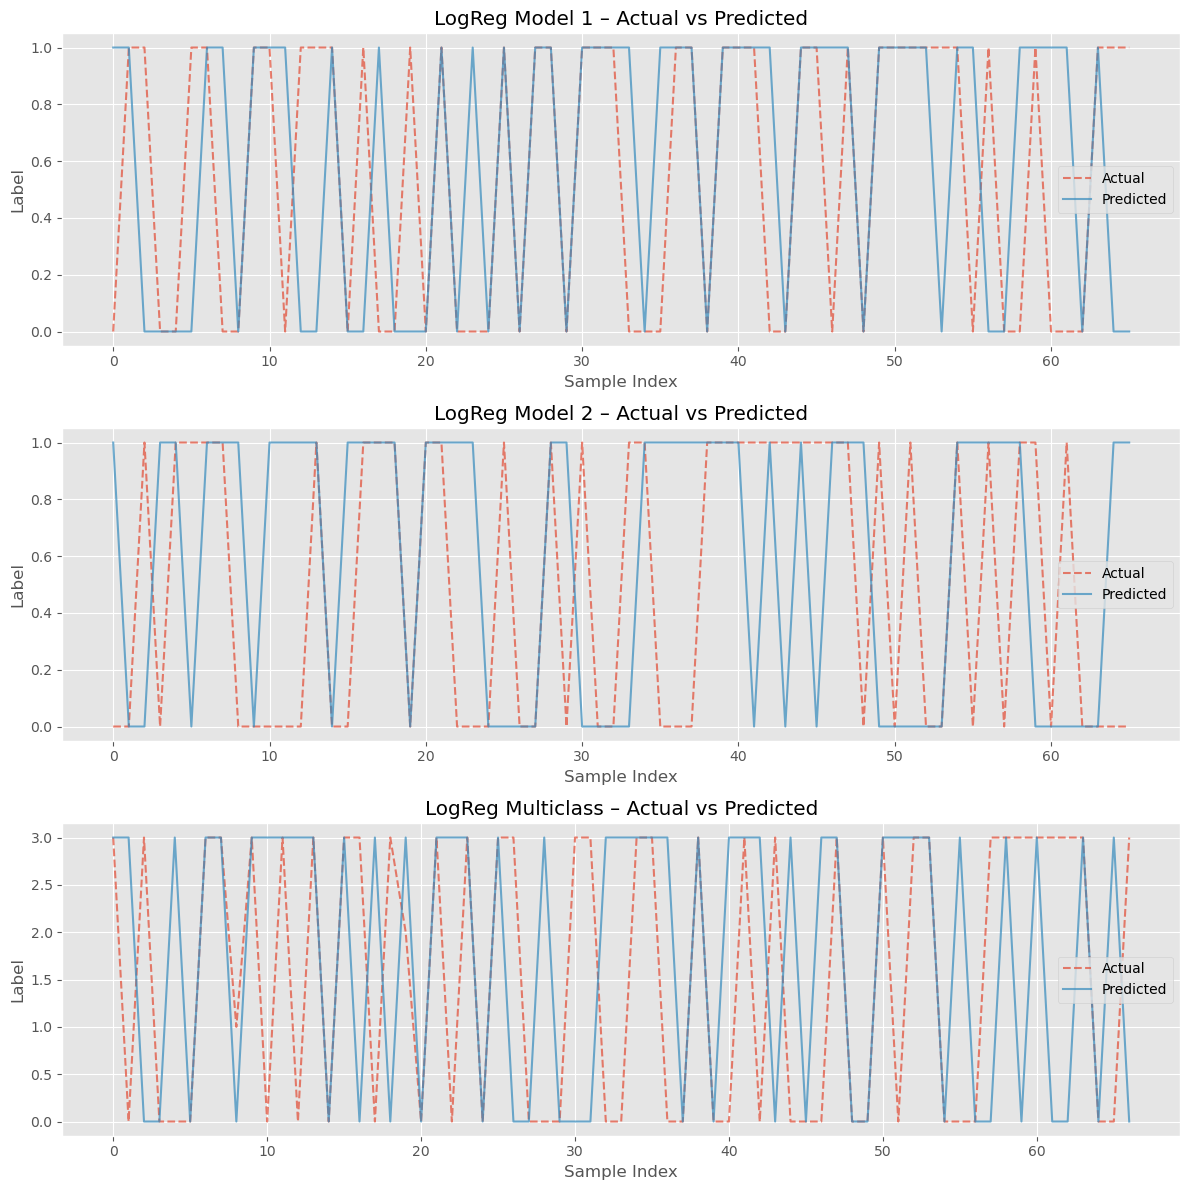

In [ ]:
for name, (model, X, y) in models.items():
    evaluate_model(model, X, y, name=name)

viz_model_performance(models)


In [ ]:
# Model Resets

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(CSV_PATH)

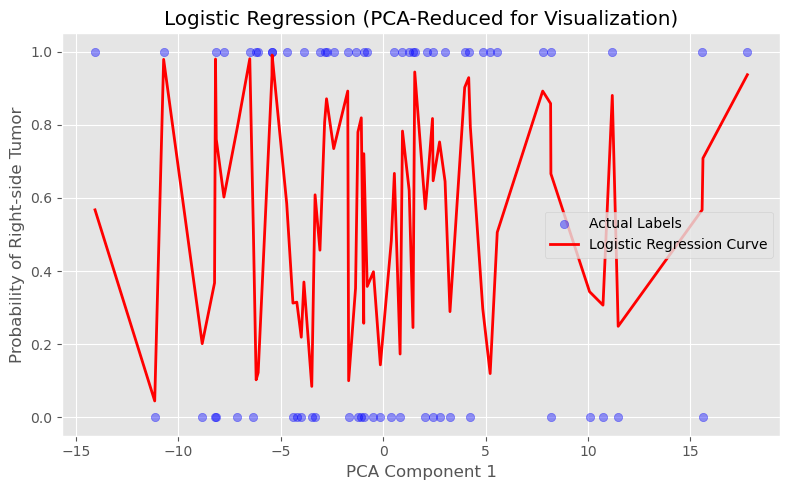

: 

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: PCA for visualization only
pca = PCA(n_components=1)
X1_test_pca = pca.fit_transform(X1_test)

# Step 2: Get predicted probabilities using original feature set
probs = clf.predict_proba(X1_test)[:, 1]  # Keep full feature set here!

# Step 3: Sort based on PCA-reduced values for a smooth plot
sorted_idx = np.argsort(X1_test_pca[:, 0])
X_sorted = X1_test_pca[sorted_idx]
y_sorted = y1_test[sorted_idx]
probs_sorted = probs[sorted_idx]

# Step 4: Plot sigmoid-like curve
plt.figure(figsize=(8, 5))
plt.scatter(X_sorted, y_sorted, color='blue', alpha=0.4, label="Actual Labels")
plt.plot(X_sorted, probs_sorted, color='red', linewidth=2, label="Logistic Regression Curve")
plt.title("Logistic Regression (PCA-Reduced for Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("Probability of Right-side Tumor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Method 1: Train a new logistic regression on PCA-reduced data
def method1_pca_logistic(X1_test, y1_test):
    """Train logistic regression on PCA-reduced data for smooth visualization"""
    # Reduce to 1D using PCA
    pca = PCA(n_components=1)
    X_pca = pca.fit_transform(X1_test)
    
    # Train new logistic regression on PCA data
    clf_pca = LogisticRegression()
    clf_pca.fit(X_pca, y1_test)
    
    # Create smooth curve
    x_range = np.linspace(X_pca.min(), X_pca.max(), 300)
    y_probs = clf_pca.predict_proba(x_range.reshape(-1, 1))[:, 1]
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca, y1_test, alpha=0.4, label="Actual Labels")
    plt.plot(x_range, y_probs, 'r-', linewidth=2, label="Logistic Regression Curve")
    plt.title("Method 1: Logistic Regression on PCA-Reduced Data")
    plt.xlabel("PCA Component 1")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Method 2: Use decision function for smoother results
def method2_decision_function(X1_test, y1_test, clf):
    """Use decision function instead of predict_proba for potentially smoother results"""
    # PCA for visualization
    pca = PCA(n_components=1)
    X_pca = pca.fit_transform(X1_test)
    
    # Get decision function scores (before sigmoid transformation)
    decision_scores = clf.decision_function(X1_test)
    
    # Apply sigmoid manually
    probs = 1 / (1 + np.exp(-decision_scores))
    
    # Sort and plot
    sorted_idx = np.argsort(X_pca[:, 0])
    X_sorted = X_pca[sorted_idx, 0]
    y_sorted = y1_test[sorted_idx]
    probs_sorted = probs[sorted_idx]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_sorted, y_sorted, alpha=0.4, label="Actual Labels")
    plt.plot(X_sorted, probs_sorted, 'r-', linewidth=2, label="Logistic Regression Curve")
    plt.title("Method 2: Using Decision Function + Manual Sigmoid")
    plt.xlabel("PCA Component 1")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Method 3: Binning approach for smoother visualization
def method3_binning(X1_test, y1_test, clf, n_bins=50):
    """Use binning to create smoother visualization"""
    # PCA for x-axis
    pca = PCA(n_components=1)
    X_pca = pca.fit_transform(X1_test)
    
    # Get probabilities from original model
    probs = clf.predict_proba(X1_test)[:, 1]
    
    # Create bins and average probabilities within each bin
    x_flat = X_pca[:, 0]
    bins = np.linspace(x_flat.min(), x_flat.max(), n_bins)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    bin_indices = np.digitize(x_flat, bins)
    
    binned_probs = []
    binned_actual = []
    valid_centers = []
    
    for i in range(1, len(bins)):
        mask = bin_indices == i
        if np.sum(mask) > 0:
            binned_probs.append(np.mean(probs[mask]))
            binned_actual.append(np.mean(y1_test[mask]))
            valid_centers.append(bin_centers[i-1])
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca, y1_test, alpha=0.3, label="Actual Labels", s=20)
    plt.plot(valid_centers, binned_probs, 'r-', linewidth=3, label="Smoothed Logistic Curve")
    plt.scatter(valid_centers, binned_actual, color='orange', s=30, label="Binned Actual", alpha=0.7)
    plt.title("Method 3: Binned Smoothing")
    plt.xlabel("PCA Component 1")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Method 4: Simple 1D logistic regression (if you have a single important feature)
def method4_single_feature(X, y, feature_idx=0):
    """Train logistic regression on single most important feature"""
    # Use single feature
    X_single = X[:, feature_idx].reshape(-1, 1)
    
    # Train logistic regression
    clf_single = LogisticRegression()
    clf_single.fit(X_single, y)
    
    # Create smooth curve
    x_range = np.linspace(X_single.min(), X_single.max(), 300)
    y_probs = clf_single.predict_proba(x_range.reshape(-1, 1))[:, 1]
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X_single, y, alpha=0.4, label="Actual Labels")
    plt.plot(x_range, y_probs, 'r-', linewidth=2, label="Logistic Regression Curve")
    plt.title(f"Method 4: Single Feature Logistic Regression (Feature {feature_idx})")
    plt.xlabel(f"Feature {feature_idx}")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# HOW TO USE METHOD 1 WITH YOUR DATA:
# Simply replace your existing plotting code with this:

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Reduce your data to 1D using PCA
pca = PCA(n_components=1)
X1_test_pca = pca.fit_transform(X1_test)

# Step 2: Train a NEW logistic regression model on the PCA-reduced data
clf_pca = LogisticRegression()
clf_pca.fit(X1_test_pca, y1_test)

# Step 3: Create a smooth range of x-values for the curve
x_range = np.linspace(X1_test_pca.min(), X1_test_pca.max(), 300)

# Step 4: Get smooth probability predictions
y_probs_smooth = clf_pca.predict_proba(x_range.reshape(-1, 1))[:, 1]

# Step 5: Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(X1_test_pca, y1_test, alpha=0.4, color='blue', label="Actual Labels")
plt.plot(x_range, y_probs_smooth, 'r-', linewidth=2, label="Logistic Regression Curve")
plt.title("Smooth Logistic Regression Curve (PCA-Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("Probability of Right-side Tumor")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: Print model performance on PCA data
print(f"Accuracy on PCA data: {clf_pca.score(X1_test_pca, y1_test):.3f}")

# Example usage for the function version:
# method1_pca_logistic(X1_test, y1_test)

print("Choose the method that best fits your needs:")
print("Method 1: Train new model on PCA data (recommended for visualization)")
print("Method 2: Use decision function with manual sigmoid")
print("Method 3: Bin and smooth the predictions")
print("Method 4: Use single most important feature")